In [23]:
import numpy as np
import pandas as pd
from oop_python import ContentFilter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.offline as py



import model as linear
from sklearn import metrics

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [24]:
def if_incorrect_row(name):
    data = pd.read_csv(name, header=None,sep=',', comment='#')
    data.columns = [i for i in  data.loc[[0]].values[0]]
    data = data.drop([0])
    data.index = range(data.shape[0])
    return data

data_classification = if_incorrect_row('data_classification.csv')
test_regression = if_incorrect_row('test_regression.csv')
train_regression = if_incorrect_row('train_regression.csv')

data_classification = data_classification.rename(index=str, columns={"sinner/saint": "sinner_saint"})

data_classification[data_classification.columns] = data_classification[data_classification.columns].apply(pd.to_numeric, errors='coerce')
test_regression[test_regression.columns] = test_regression[test_regression.columns].apply(pd.to_numeric, errors='coerce')
train_regression[train_regression.columns] = train_regression[train_regression.columns].apply(pd.to_numeric, errors='coerce')

test_regression = linear.normalize_data(test_regression)
train_regression = linear.normalize_data(train_regression)


print(data_classification)
print(test_regression)
print(train_regression)

     missedDeadlinesIndex  plagiarismRatio  sinner_saint
0                0.051267         0.699560             1
1               -0.092742         0.684940             1
2               -0.213710         0.692250             1
3               -0.375000         0.502190             1
4               -0.513250         0.465640             1
5               -0.524770         0.209800             1
6               -0.398040         0.034357             1
7               -0.305880        -0.192250             1
8                0.016705        -0.404240             1
9                0.131910        -0.513890             1
10               0.385370        -0.565060             1
11               0.529380        -0.521200             1
12               0.638820        -0.243420             1
13               0.736750        -0.184940             1
14               0.546660         0.487570             1
15               0.322000         0.582600             1
16               0.166470      

# Ploting data

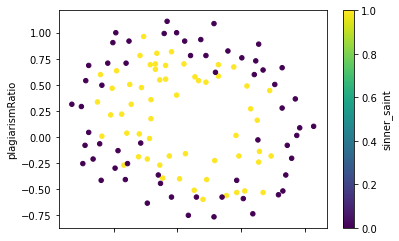

In [25]:
# For  Classification
ax1 = data_classification.plot.scatter(x='missedDeadlinesIndex',y='plagiarismRatio',c='sinner_saint',colormap='viridis')

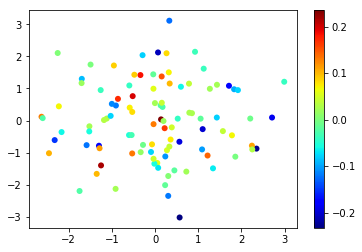

In [26]:
from sklearn.decomposition import PCA
predictors = train_regression.columns.drop(['y'])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_regression[predictors])
data_pca_result = pd.DataFrame(pca_result,columns=['x1', 'x2'])
data_pca_result['y'] = train_regression['y']

for i in data_pca_result.index:
    data_pca_result['y'].loc[i] = data_pca_result['y'].loc[i] / 10

points = plt.scatter(data_pca_result.x1, data_pca_result.x2, c=data_pca_result.y,cmap="jet", lw=0)
plt.colorbar(points)
#################################### !
#################################### !
#################################### !
predictors = train_regression.columns.drop(['y'])


tsne_data = pd.DataFrame(TSNE(n_components=2).fit_transform(train_regression[predictors].values),columns=['x1', 'x2'])
tsne_data['y'] = data_pca_result['y']

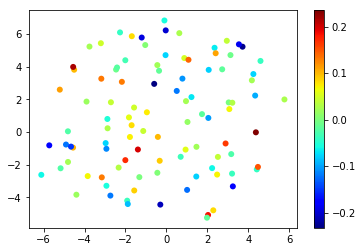

In [27]:
points1 = plt.scatter(tsne_data.x1, tsne_data.x2, c=tsne_data.y,cmap="jet", lw=0)
plt.colorbar(points1)

In [28]:
def modelfitAccurasy(alg, dtrain, dtest,target_train, target_test):
    '''
    Accurasy and model
    '''
    alg.fit(dtrain, target_train)
    dtrain_predictions = alg.predict(dtrain)
    
    y_pred = alg.predict(dtest)
    y_true = target_test
    
    y_pred_train = alg.predict(dtrain)
    y_true_train = target_train
    
    #print(y_true_train, y_pred_train)
    
    
       
    print("Model report ###############################################!")
    print('Accuracy on train == ',accuracy_score(y_true_train, y_pred_train))
    print('f1_score == ', f1_score(y_true_train, y_pred_train, average='macro'))
    print('Accuracy on test == ',accuracy_score(y_true, y_pred))
    print('f1_score == ', f1_score(y_true, y_pred, average='macro'))
    print("End of model report ########################################!")   
    return alg

def split_data_for_Linear_reg_imp(data_train, data_test, target, predictors):
    
    X_train = data_train[predictors].values
    y_train = data_train[target].values.flatten()
    X_test = data_test[predictors].values
    y_test = data_test[target].values.flatten()

    return X_train, y_train, X_test, y_test

def modelfitRegresion(alg, dtrain, dtest,target_train, target_test):
    
    alg.fit(dtrain, target_train)
    dtrain_predictions = alg.predict(dtrain)
    
    y_pred = alg.predict(dtest)
    y_true = target_test
    
    y_pred_train = alg.predict(dtrain)
    y_true_train = target_train
    
    print("Model report ###############################################!")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((target_train).values, dtrain_predictions)))        
    print("End of model report ########################################!")
    
    return alg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-03-22 14:11:01] Features: 1/10 -- score: -0.9827763871482246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-03-22 14:11:01] Features: 2/10 -- score: -0.9338072892402358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-03-22 14:11:01] Features: 3/10 -- score: -0.9289923409666404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



[2019-03-22 14:11:01] Features: 8/10 -- score: -1.0227567509388371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2019-03-22 14:11:01] Features: 9/10 -- score: -1.0731912691519834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2019-03-22 14:11:01] Features: 10/10 -- score: -1.13442637711333

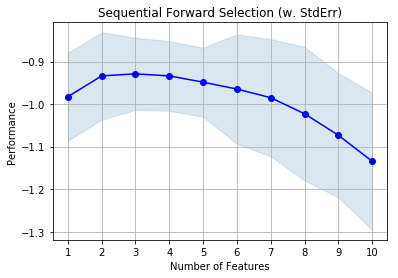

('x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10')
We shuld use : Index(['x1', 'x2', 'x3'], dtype='object')


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


from sklearn.linear_model import Ridge
#clf = Ridge(alpha=0.8)
#model_Ridge = modelfitRegresion(clf, train_regression[column], test_regression[column], target_train, target_train)

from sklearn import datasets, linear_model


predictors = train_regression.columns.drop(['y'])
X = train_regression[predictors]
y = train_regression['y']


#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
linearModel = Ridge(alpha=0.8)
linearModel.fit(X, y)


sfs1 = sfs(linearModel,k_features=10,forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=5)
sfs1 = sfs1.fit(X, y)
print(list(sfs1.k_feature_idx_))


from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


print(sfs1.k_feature_names_)
predictors_for_regresion = train_regression.columns.drop([i for i in train_regression.columns if i not in ['x1', 'x2', 'x3']])
target = 'y'
print('We shuld use :', predictors_for_regresion)

In [30]:
data_classification['x1'] = data_classification['missedDeadlinesIndex']**2
data_classification['x2'] = data_classification['plagiarismRatio']**2
data_classification['x3'] = data_classification['missedDeadlinesIndex'] * data_classification['plagiarismRatio']
data_classification['x4'] = (data_classification['missedDeadlinesIndex'] + data_classification['plagiarismRatio'])/2

# Task 1

In [31]:
data_classification = shuffle(data_classification)
train_df, test_df, Y_train, Y_test =  train_test_split (data_classification, data_classification['sinner_saint'], test_size = 0.20, random_state=42)
predictors_of_data_classification = data_classification.columns.drop(['sinner_saint'])

In [32]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth=10000,n_estimators=1000)
model_RandomForestClassifier = modelfitAccurasy(model1, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test) 

Model report ###############################################!
Accuracy on train ==  1.0
f1_score ==  1.0
Accuracy on test ==  0.625
f1_score ==  0.6243478260869565
End of model report ########################################!


In [33]:
model2 = linear.LogisticRegression(0.5600000000000003,0.8,'l2',1e-10)
model_lr_impl = modelfitAccurasy(model2, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)

Epoch:   1 Loss: 0.7751138817873924
Epoch:   2 Loss: 0.7403197677998266
Epoch:   3 Loss: 0.7202023619734357
Epoch:   4 Loss: 0.7100114329659342
Epoch:   5 Loss: 0.7065662647594937
Epoch:   6 Loss: 0.7077668090970587
Epoch:   7 Loss: 0.7122428648497463
Epoch:   8 Loss: 0.719110191617849
Epoch:   9 Loss: 0.7278044141670879
Epoch:  10 Loss: 0.7379694641491413
Epoch:  11 Loss: 0.7493834044551668
Epoch:  12 Loss: 0.761909516300744
Epoch:  13 Loss: 0.7754642991449142
Epoch:  14 Loss: 0.7899967170250702
Epoch:  15 Loss: 0.8054748814745631
Epoch:  16 Loss: 0.8218776247370702
Epoch:  17 Loss: 0.8391892686976268
Epoch:  18 Loss: 0.8573964657957627
Epoch:  19 Loss: 0.8764863694565668
Epoch:  20 Loss: 0.8964456456178735
Epoch:  21 Loss: 0.9172600058540521
Epoch:  22 Loss: 0.9389140546667355
Epoch:  23 Loss: 0.9613913176503058
Epoch:  24 Loss: 0.9846743660919891
Epoch:  25 Loss: 1.0087449855837622
Epoch:  26 Loss: 1.0335843570520922
Epoch:  27 Loss: 1.0591732320240417
Epoch:  28 Loss: 1.08549209246

Epoch: 312 Loss: 10.342982988319227
Epoch: 313 Loss: 10.358875896616318
Epoch: 314 Loss: 10.374667509486065
Epoch: 315 Loss: 10.390358384085868
Epoch: 316 Loss: 10.405949075978764
Epoch: 317 Loss: 10.421440139109373
Epoch: 318 Loss: 10.436832125780557
Epoch: 319 Loss: 10.45212558663077
Epoch: 320 Loss: 10.467321070612108
Epoch: 321 Loss: 10.482419124969038
Epoch: 322 Loss: 10.497420295217776
Epoch: 323 Loss: 10.512325125126315
Epoch: 324 Loss: 10.527134156695112
Epoch: 325 Loss: 10.541847930138367
Epoch: 326 Loss: 10.556466983865933
Epoch: 327 Loss: 10.570991854465825
Epoch: 328 Loss: 10.585423076687333
Epoch: 329 Loss: 10.59976118342465
Epoch: 330 Loss: 10.614006705701163
Epoch: 331 Loss: 10.628160172654209
Epoch: 332 Loss: 10.642222111520423
Epoch: 333 Loss: 10.656193047621615
Epoch: 334 Loss: 10.670073504351148
Epoch: 335 Loss: 10.683864003160865
Epoch: 336 Loss: 10.697565063548454
Epoch: 337 Loss: 10.711177203045395
Epoch: 338 Loss: 10.7247009372053
Epoch: 339 Loss: 10.738136779592

# Task 2

In [34]:
train_regression = linear.normalize_data(train_regression)
test_regression = linear.normalize_data(test_regression)
column =  train_regression.columns.drop([i for i in train_regression.columns if i not in ['x1','x2','x3']])
column1 = train_regression.columns.drop(['y'])

In [35]:
model2 = linear.LinearRegression(regularization="l2")
target_train = train_regression['y']
target_test = test_regression['y']

model_lreg_impl = modelfitRegresion(model2, train_regression[column1], test_regression[column1], target_train, target_train)

Epoch:   1 Loss: 1.0590960897667065
Epoch:   2 Loss: 1.0570054278560765
Epoch:   3 Loss: 1.0549457210604438
Epoch:   4 Loss: 1.0529165639900149
Epoch:   5 Loss: 1.0509175564044113
Epoch:   6 Loss: 1.0489483031474327
Epoch:   7 Loss: 1.0470084140826568
Epoch:   8 Loss: 1.0450975040298514
Epoch:   9 Loss: 1.043215192702207
Epoch:  10 Loss: 1.0413611046443618
Epoch:  11 Loss: 1.0395348691712216
Epoch:  12 Loss: 1.037736120307553
Epoch:  13 Loss: 1.0359644967283521
Epoch:  14 Loss: 1.0342196416999716
Epoch:  15 Loss: 1.032501203021994
Epoch:  16 Loss: 1.0308088329698488
Epoch:  17 Loss: 1.0291421882381608
Epoch:  18 Loss: 1.0275009298848155
Epoch:  19 Loss: 1.0258847232757424
Epoch:  20 Loss: 1.024293238030395
Epoch:  21 Loss: 1.022726147967931
Epoch:  22 Loss: 1.021183131054072
Epoch:  23 Loss: 1.0196638693486422
Epoch:  24 Loss: 1.0181680489537774
Epoch:  25 Loss: 1.016695359962784
Epoch:  26 Loss: 1.0152454964096598
Epoch:  27 Loss: 1.0138181562192474
Epoch:  28 Loss: 1.0124130411580297

Epoch: 274 Loss: 0.9482994357953562
Epoch: 275 Loss: 0.9484058154888452
Epoch: 276 Loss: 0.9485124800325134
Epoch: 277 Loss: 0.9486194189145621
Epoch: 278 Loss: 0.9487266217813654
Epoch: 279 Loss: 0.9488340784354218
Epoch: 280 Loss: 0.9489417788333198
Epoch: 281 Loss: 0.9490497130837425
Epoch: 282 Loss: 0.9491578714454859
Epoch: 283 Loss: 0.9492662443255078
Epoch: 284 Loss: 0.9493748222770009
Epoch: 285 Loss: 0.9494835959974849
Epoch: 286 Loss: 0.9495925563269316
Epoch: 287 Loss: 0.9497016942459043
Epoch: 288 Loss: 0.949811000873726
Epoch: 289 Loss: 0.9499204674666677
Epoch: 290 Loss: 0.9500300854161627
Epoch: 291 Loss: 0.9501398462470412
Epoch: 292 Loss: 0.9502497416157828
Epoch: 293 Loss: 0.950359763308801
Epoch: 294 Loss: 0.9504699032407377
Epoch: 295 Loss: 0.9505801534527895
Epoch: 296 Loss: 0.9506905061110458
Epoch: 297 Loss: 0.9508009535048553
Epoch: 298 Loss: 0.9509114880452072
Epoch: 299 Loss: 0.9510221022631371
Epoch: 300 Loss: 0.9511327888081496
Epoch: 301 Loss: 0.95124354044

In [36]:
model2 = linear.LinearRegression(regularization="l2")
model_lreg_impl = modelfitRegresion(model2, train_regression[column1], test_regression[column1], target_train, target_train)

Epoch:   1 Loss: 1.0590960897667065
Epoch:   2 Loss: 1.0570054278560765
Epoch:   3 Loss: 1.0549457210604438
Epoch:   4 Loss: 1.0529165639900149
Epoch:   5 Loss: 1.0509175564044113
Epoch:   6 Loss: 1.0489483031474327
Epoch:   7 Loss: 1.0470084140826568
Epoch:   8 Loss: 1.0450975040298514
Epoch:   9 Loss: 1.043215192702207
Epoch:  10 Loss: 1.0413611046443618
Epoch:  11 Loss: 1.0395348691712216
Epoch:  12 Loss: 1.037736120307553
Epoch:  13 Loss: 1.0359644967283521
Epoch:  14 Loss: 1.0342196416999716
Epoch:  15 Loss: 1.032501203021994
Epoch:  16 Loss: 1.0308088329698488
Epoch:  17 Loss: 1.0291421882381608
Epoch:  18 Loss: 1.0275009298848155
Epoch:  19 Loss: 1.0258847232757424
Epoch:  20 Loss: 1.024293238030395
Epoch:  21 Loss: 1.022726147967931
Epoch:  22 Loss: 1.021183131054072
Epoch:  23 Loss: 1.0196638693486422
Epoch:  24 Loss: 1.0181680489537774
Epoch:  25 Loss: 1.016695359962784
Epoch:  26 Loss: 1.0152454964096598
Epoch:  27 Loss: 1.0138181562192474
Epoch:  28 Loss: 1.0124130411580297

Epoch: 252 Loss: 0.9460545695032206
Epoch: 253 Loss: 0.946151675096411
Epoch: 254 Loss: 0.9462493413209581
Epoch: 255 Loss: 0.9463475536093866
Epoch: 256 Loss: 0.9464462976047684
Epoch: 257 Loss: 0.9465455591580206
Epoch: 258 Loss: 0.9466453243252263
Epoch: 259 Loss: 0.9467455793649957
Epoch: 260 Loss: 0.9468463107358592
Epoch: 261 Loss: 0.9469475050936904
Epoch: 262 Loss: 0.9470491492891602
Epoch: 263 Loss: 0.9471512303652331
Epoch: 264 Loss: 0.947253735554679
Epoch: 265 Loss: 0.9473566522776282
Epoch: 266 Loss: 0.9474599681391542
Epoch: 267 Loss: 0.9475636709268815
Epoch: 268 Loss: 0.9476677486086318
Epoch: 269 Loss: 0.9477721893300913
Epoch: 270 Loss: 0.9478769814125135
Epoch: 271 Loss: 0.9479821133504485
Epoch: 272 Loss: 0.9480875738094978
Epoch: 273 Loss: 0.9481933516241026
Epoch: 274 Loss: 0.9482994357953562
Epoch: 275 Loss: 0.9484058154888452
Epoch: 276 Loss: 0.9485124800325134
Epoch: 277 Loss: 0.9486194189145621
Epoch: 278 Loss: 0.9487266217813654
Epoch: 279 Loss: 0.94883407843

Epoch: 487 Loss: 0.9689731808745163
Epoch: 488 Loss: 0.9690444761071944
Epoch: 489 Loss: 0.9691155031850283
Epoch: 490 Loss: 0.9691862626125715
Epoch: 491 Loss: 0.9692567549006841
Epoch: 492 Loss: 0.9693269805664042
Epoch: 493 Loss: 0.9693969401328187
Epoch: 494 Loss: 0.9694666341289364
Epoch: 495 Loss: 0.9695360630895641
Epoch: 496 Loss: 0.9696052275551829
Epoch: 497 Loss: 0.9696741280718265
Epoch: 498 Loss: 0.9697427651909621
Epoch: 499 Loss: 0.9698111394693725
Epoch: 500 Loss: 0.969879251469038
Model report ###############################################!
RMSE : 0.8947
End of model report ########################################!


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sk

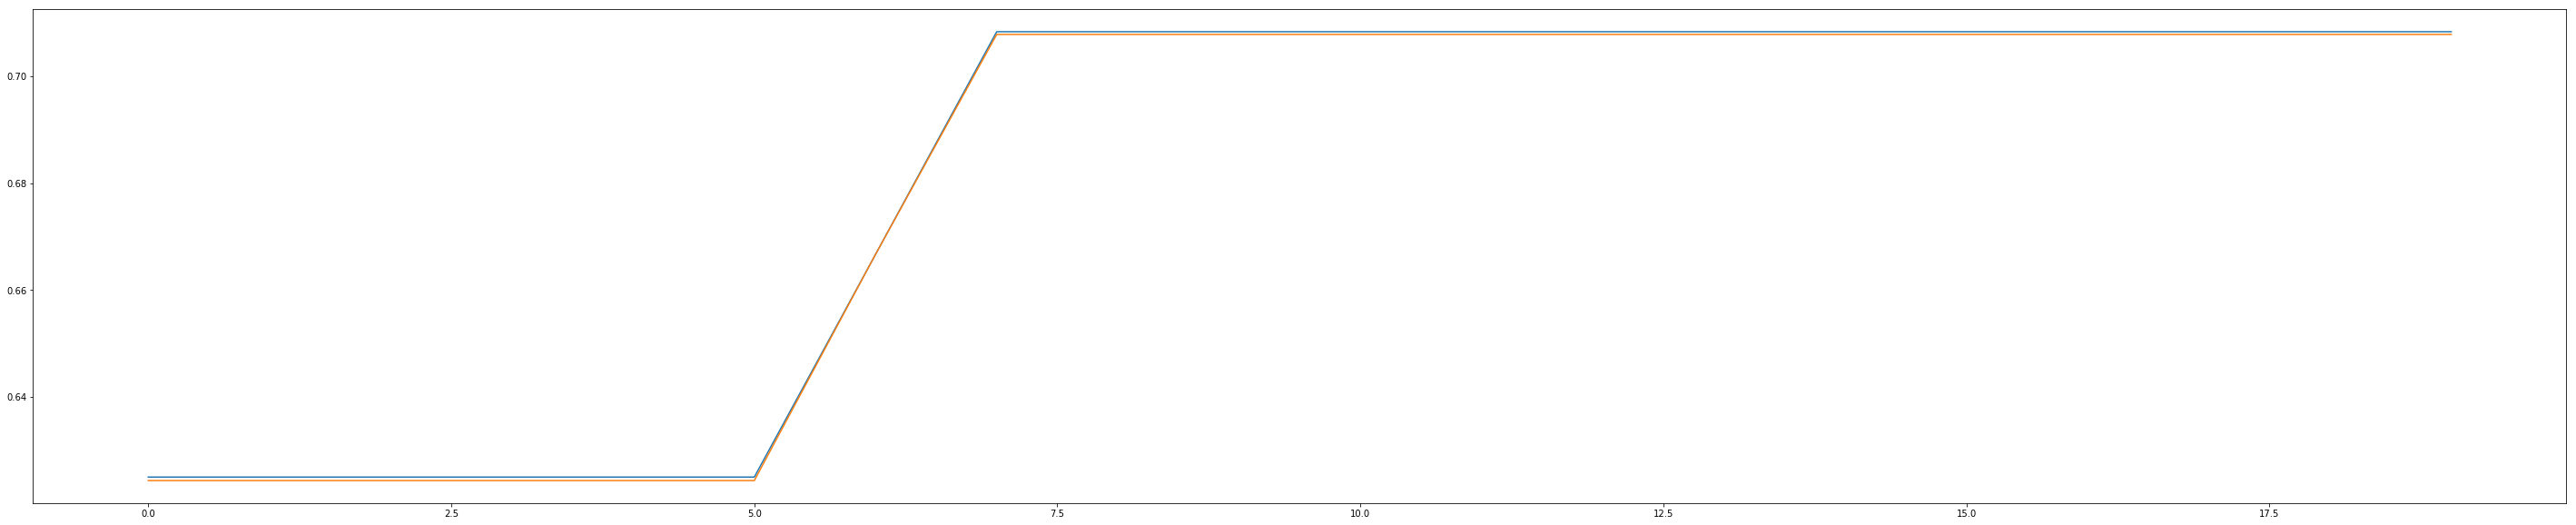

In [43]:
from sklearn.linear_model import LogisticRegression
import model_plot
lst_model = [LogisticRegression(C=c) for c in np.arange(1,1.2,0.01)]
model_plot.lst_metrix_plot(lst_model, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)
#print([c for c in np.arange(1,10,0.01)])
#lst_model = [LogisticRegression(C=0.875,tol=0.0001) for tol in np.arange(0.0001,0.01,0.001)]
#model_plot.lst_metrix_plot(lst_model, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)




In [46]:
model_LogisticRegression = LogisticRegression(C=1.2)#C=0.8,tol=0.5600000000000003
model_LogisticRegression = modelfitAccurasy(model_LogisticRegression, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)


Model report ###############################################!
Accuracy on train ==  0.7872340425531915
f1_score ==  0.7791353383458646
Accuracy on test ==  0.7083333333333334
f1_score ==  0.7078260869565218
End of model report ########################################!


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



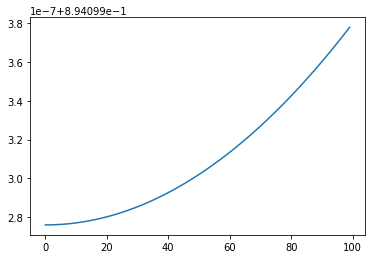

In [47]:
from sklearn.linear_model import Ridge
#clf = Ridge(alpha=0.8)
#model_Ridge = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)

lst_model = [Ridge(alpha=a) for a in np.arange(0.0000001,0.1,0.001)]
model_plot.lst_metrix_plot(lst_model, train_regression[column1], test_regression[column1], target_train, target_train, model_plot.modelfitRegresion)



In [48]:
clf = Ridge(alpha=0.0000001)
model_Ridge = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)


Model report ###############################################!
RMSE : 0.8941
End of model report ########################################!


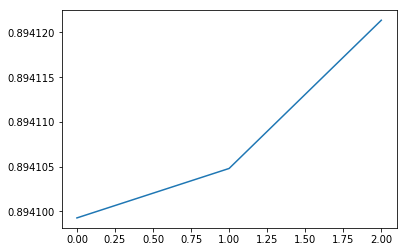

In [49]:
from sklearn.linear_model import Lasso
#clf = linear_model.Lasso(alpha=0.1)
lst_model = [Lasso(alpha=a) for a in np.arange(0.0000001,0.02/7,0.001)]
model_plot.lst_metrix_plot(lst_model, train_regression[column1], test_regression[column1], target_train, target_train, model_plot.modelfitRegresion)


In [50]:
clf = Lasso(alpha=0.2)
model_Lasso = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)


Model report ###############################################!
RMSE : 0.9807
End of model report ########################################!
